**Machine translation** : Convert a paragraph in a source language to its equivalent in a target language.

An encoder model turns the source sequence into an intermediate representation.

A decoder is trained to predict the next token i in the target sequence by looking at both previous tokens (0 to i - 1) and the encoded source sequence.



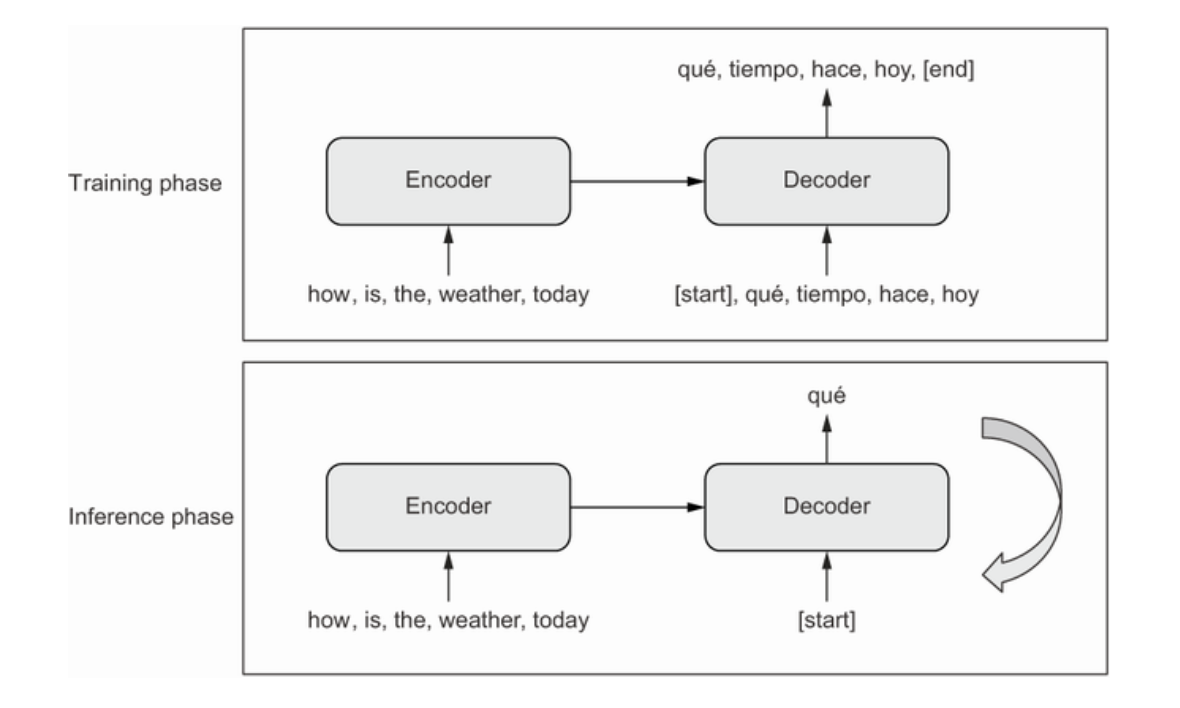

Neural machine translation is the use of deep neural networks for the problem of machine translation.

In [3]:
# load data into memory
def load_data(filename):
 # open the file as read only
 file = open(filename, mode='rt', encoding='utf-8')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

In [4]:
# split a loaded document into sentences
def to_pairs(doc):
 lines = doc.strip().split('\n')
 pairs = [line.split('\t') for line in  lines]
 return pairs

In [6]:
def clean_pairs(lines):
 cleaned = list()
 # prepare regex for char filtering
 re_print = re.compile('[^%s]' % re.escape(string.printable))
 # prepare translation table for removing punctuation
 table = str.maketrans('', '', string.punctuation)
 for pair in lines:
     clean_pair = list()
     for line in pair:
         # normalize unicode characters
         line = normalize('NFD', line).encode('ascii', 'ignore')
         line = line.decode('UTF-8')
         # tokenize on white space
         line = line.split()
         # convert to lowercase
         line = [word.lower() for word in line]
         # remove punctuation from each token
         line = [word.translate(table) for word in line]
         # remove non-printable chars form each token
         line = [re_print.sub('', w) for w in line]
         # remove tokens with numbers in them
         line = [word for word in line if word.isalpha()]
         # store as string
         clean_pair.append(' '.join(line))
         cleaned.append(clean_pair)
 return array(cleaned)

IndentationError: expected an indented block (1092160990.py, line 8)